In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [39]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [40]:
# drive.flush_and_unmount()

In [41]:
df = pd.read_csv('/content/drive/MyDrive/ML/dataset/age_gender.csv')
print(df.pixels.nunique())
#Finding no. of null values
print(df.pixels.isnull().sum())
#Finding repaeted rows
df_repeated = df.groupby('pixels').filter(lambda x: len(x) > 1)
print(df_repeated.head())

#FInding the no of unique rows that are repeated
print(len(df_repeated.groupby(['pixels'])))
print(len(df_repeated.groupby(['pixels', 'age', 'ethnicity', 'gender'])))

#Since there is an abnormality & confusion n the data lebels as seen by printing the values, we choose to drop the repeated rows = 765 directly. So are choosing 22940 rows for our model.
df_final = df.groupby('pixels').filter(lambda x: len(x) == 1)

#Converting pixels to array of pixels
df_final['pixels'] = df_final['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))

#printing rows and colums
print(df.shape)
print(df_final.head())
# normalizing pixels data
df_final['pixels'] = df_final['pixels'].apply(lambda x: x/255)
df_final = df_final.sample(frac=1).reset_index(drop=True)
#COnverting to list
X = np.array(df_final['pixels'].tolist())
print(X.shape)
print(X[0])
print(len(X[0]))
print(X.shape[0])
# Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)
print(X.shape[0])
print(X[0])

23315
0
     age  ...                                             pixels
135    1  ...  43 39 31 37 33 31 39 43 70 93 118 131 153 116 ...
302    1  ...  233 214 152 91 49 33 56 94 109 104 99 92 88 94...
349    1  ...  254 238 205 193 178 195 196 196 187 183 189 17...
486    1  ...  196 196 197 197 200 201 202 202 200 201 201 20...
497    1  ...  196 196 197 197 200 201 202 202 200 201 201 20...

[5 rows x 5 columns]
375
641
(23705, 5)
   age  ...                                             pixels
0    1  ...  [129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...
1    1  ...  [164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....
2    1  ...  [67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....
3    1  ...  [193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...
4    1  ...  [202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...

[5 rows x 5 columns]
(22940, 2304)
[0.8235294  0.83137256 0.85490197 ... 0.53333336 0.46666667 0.6156863 ]
2304
22940
22940
[[[0.8235294 ]
  [0.83137256]
  [0.85490197]
  ...
  [0.60

In [42]:
X.shape

(22940, 48, 48, 1)

### **To reshuffle the dataset so that machine learns correclty**

In [5]:
#import random
#random.shuffle(X)

In [43]:
df_final

,age,ethnicity,gender,img_name,pixels
0,85,0,1,20170120225733929.jpg.chip.jpg,"[0.8235294, 0.83137256, 0.85490197, 0.80784315..."
1,34,0,1,20170103182647402.jpg.chip.jpg,"[0.3019608, 0.20392157, 0.11372549, 0.1882353,..."
2,30,1,0,20170117130022204.jpg.chip.jpg,"[0.57254905, 0.54509807, 0.5568628, 0.5921569,..."
3,26,3,1,20170104232550697.jpg.chip.jpg,"[0.9490196, 0.40392157, 0.11372549, 0.07058824..."
4,27,0,0,20170116182634081.jpg.chip.jpg,"[0.25882354, 0.1764706, 0.09019608, 0.03137255..."
...,...,...,...,...,...
22935,68,1,0,20170117194555228.jpg.chip.jpg,"[0.7490196, 0.7490196, 0.7529412, 0.7607843, 0..."
22936,30,0,1,20170103182425185.jpg.chip.jpg,"[0.39215687, 0.32941177, 0.28235295, 0.3372549..."
22937,29,2,0,20170116164431232.jpg.chip.jpg,"[0.7294118, 0.73333335, 0.7254902, 0.6666667, ..."
22938,32,0,0,20170104202207601.jpg.chip.jpg,"[0.101960786, 0.101960786, 0.12941177, 0.21568..."


In [44]:
num_pixels = 2304
img_height = 48
img_width = 48

In [ ]:
# y_gender = np.array(df_final['gender'])
# y_ethnicity = np.array(df_final['ethnicity'])
# y_age = np.array(df_final['age'])

In [ ]:
# X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.7)
# X_ethnicity_train, X_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(X, y_ethnicity, train_size=0.7)
# X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.7)

### ***dusra kaggle notebook***

In [45]:
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [46]:
# Set some useful variables
input_shape = X.shape[1:] 
print(input_shape)
n_epochs = 20
batch_size = 64

(48, 48, 1)


In [47]:
#Added by KP
y_new = np.array(df_final[['gender', 'ethnicity', 'age']])

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_train,y_train,test_size = 0.25,train_size =0.75)

y_gender_train = y_train[:,0]
y_gender_test = y_test[:,0]
y_gender_cv = y_cv[:,0]

y_age_train = y_train[:,2]
y_age_test = y_test[:,2]
y_age_cv = y_cv[:,2]

y_ethnicity_train = y_train[:,1]
y_ethnicity_test = y_test[:,1]
y_ethnicity_cv = y_cv[:,1]

#FInding the position to slice
eth_train_len = len(y_ethnicity_train)
eth_cv_len=len(y_ethnicity_cv)
#COncatenating the dataset
y_ethnicity_concat = np.concatenate((y_ethnicity_train,y_ethnicity_cv, y_ethnicity_test))

#COne hot encoding
y_ethnicity = to_categorical(y_ethnicity_concat)

y_ethnicity_train = y_ethnicity[:eth_train_len]
y_ethnicity_cv=y_ethnicity[eth_train_len:(eth_train_len+eth_cv_len)]
y_ethnicity_test = y_ethnicity[(eth_train_len+eth_cv_len):]
print(len(y_ethnicity_train))
print(len(y_ethnicity_cv))
print(len(y_ethnicity_test))
print(0.6*len(y_ethnicity))

13764
4588
4588
13764.0


In [ ]:
# Train test split
# X_train, X_test, y_train, y_test = train_test_split(X, y_age, test_size=0.2, random_state=42)

# AGE

In [ ]:
age_model = Sequential()

age_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(BatchNormalization())

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.3))
age_model.add(BatchNormalization())

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
age_model.add(MaxPooling2D(pool_size=(2,2)))
age_model.add(Dropout(0.5))
age_model.add(BatchNormalization())

age_model.add(Flatten())
age_model.add(Dense(256, activation='relu'))
age_model.add(Dropout(0.4))

age_model.add(Dense(1,activation="linear"))

age_model.compile(optimizer='adam', loss='mse')

age_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 128)       0

In [ ]:
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
history = age_model.fit(X_train, y_age_train, 
                        epochs=n_epochs,
                        batch_size=batch_size,
                        callbacks=callbacks,
                        validation_data=(X_cv, y_age_cv))

Epoch 1/20
216/216 [==============================] - 408s 2s/step - loss: 116.1855 - val_loss: 687.5424
Epoch 2/20
216/216 [==============================] - 410s 2s/step - loss: 104.9497 - val_loss: 788.8375
Epoch 3/20
216/216 [==============================] - ETA: 0s - loss: 99.4733
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
216/216 [==============================] - 408s 2s/step - loss: 99.4733 - val_loss: 1010.1667
Epoch 4/20
216/216 [==============================] - 408s 2s/step - loss: 81.1923 - val_loss: 813.1916
Epoch 5/20
216/216 [==============================] - ETA: 0s - loss: 74.0793
Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
216/216 [==============================] - 409s 2s/step - loss: 74.0793 - val_loss: 773.0288


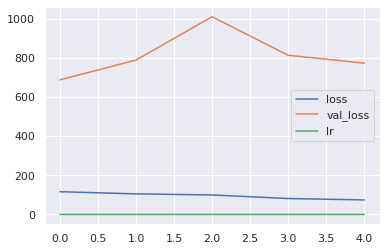

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
valid_score = age_model.evaluate(X_test, y_age_test, verbose=1)

144/144 [==============================] - 31s 218ms/step - loss: 87.9036


In [12]:
# Make predictions 
# y_pred = age_model.predict(X_test)
y_pred = loaded_model_age.predict(X_test)

In [13]:
# Man absolute error
print("MAE: {}".format(mean_absolute_error(y_age_test, y_pred)))

MAE: 6.386570553184075


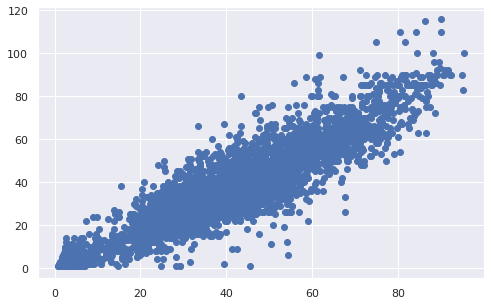

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_age_test);

/content/drive/MyDrive/ML/imgs_new/0_2_0_[1. 0. 0. 0. 0.]_.png


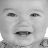

[2.3397763]
2
/content/drive/MyDrive/ML/imgs_new/1_27_1_[1. 0. 0. 0. 0.]_.png


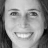

[31.032784]
27
/content/drive/MyDrive/ML/imgs_new/2_26_1_[0. 0. 1. 0. 0.]_.png


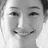

[1.6390411]
26
/content/drive/MyDrive/ML/imgs_new/3_20_1_[0. 0. 1. 0. 0.]_.png


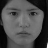

[86.55063]
20
/content/drive/MyDrive/ML/imgs_new/4_46_0_[0. 0. 0. 0. 1.]_.png


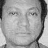

[41.86427]
46
/content/drive/MyDrive/ML/imgs_new/5_30_1_[1. 0. 0. 0. 0.]_.png


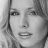

[33.819687]
30
/content/drive/MyDrive/ML/imgs_new/6_52_0_[1. 0. 0. 0. 0.]_.png


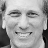

[2.3522913]
52
/content/drive/MyDrive/ML/imgs_new/7_30_1_[0. 0. 0. 1. 0.]_.png


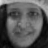

[43.894352]
30
/content/drive/MyDrive/ML/imgs_new/8_50_0_[1. 0. 0. 0. 0.]_.png


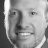

[27.517036]
50
/content/drive/MyDrive/ML/imgs_new/9_61_1_[1. 0. 0. 0. 0.]_.png


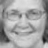

[44.80827]
61
/content/drive/MyDrive/ML/imgs_new/10_45_0_[0. 0. 0. 0. 1.]_.png


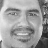

[32.595043]
45
/content/drive/MyDrive/ML/imgs_new/11_25_1_[0. 0. 1. 0. 0.]_.png


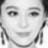

[25.07433]
25
/content/drive/MyDrive/ML/imgs_new/12_29_1_[0. 1. 0. 0. 0.]_.png


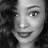

[55.143925]
29
/content/drive/MyDrive/ML/imgs_new/13_28_1_[1. 0. 0. 0. 0.]_.png


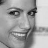

[21.95744]
28
/content/drive/MyDrive/ML/imgs_new/14_50_0_[1. 0. 0. 0. 0.]_.png


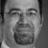

[69.7456]
50
/content/drive/MyDrive/ML/imgs_new/15_45_1_[1. 0. 0. 0. 0.]_.png


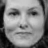

[71.43773]
45
/content/drive/MyDrive/ML/imgs_new/16_32_0_[1. 0. 0. 0. 0.]_.png


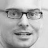

[17.820826]
32
/content/drive/MyDrive/ML/imgs_new/17_21_1_[0. 1. 0. 0. 0.]_.png


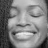

[25.45112]
21
/content/drive/MyDrive/ML/imgs_new/18_68_1_[1. 0. 0. 0. 0.]_.png


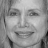

[36.543407]
68
/content/drive/MyDrive/ML/imgs_new/19_89_0_[1. 0. 0. 0. 0.]_.png


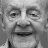

[31.641592]
89
/content/drive/MyDrive/ML/imgs_new/20_58_1_[0. 1. 0. 0. 0.]_.png


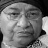

[26.717958]
58
/content/drive/MyDrive/ML/imgs_new/21_55_0_[0. 0. 0. 1. 0.]_.png


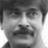

[41.512226]
55
/content/drive/MyDrive/ML/imgs_new/22_23_1_[0. 0. 1. 0. 0.]_.png


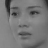

[58.974663]
23
/content/drive/MyDrive/ML/imgs_new/23_21_0_[0. 1. 0. 0. 0.]_.png


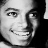

[55.307632]
21
/content/drive/MyDrive/ML/imgs_new/24_8_0_[1. 0. 0. 0. 0.]_.png


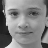

[31.302044]
8
/content/drive/MyDrive/ML/imgs_new/25_35_1_[0. 1. 0. 0. 0.]_.png


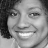

[35.723675]
35
/content/drive/MyDrive/ML/imgs_new/26_26_1_[0. 1. 0. 0. 0.]_.png


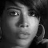

[1.9378948]
26
/content/drive/MyDrive/ML/imgs_new/27_16_1_[1. 0. 0. 0. 0.]_.png


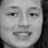

[29.204283]
16
/content/drive/MyDrive/ML/imgs_new/28_26_0_[0. 0. 1. 0. 0.]_.png


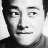

[72.826904]
26
/content/drive/MyDrive/ML/imgs_new/29_89_1_[0. 0. 0. 1. 0.]_.png


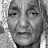

[11.9286375]
89
[[ 2.3397763]
 [31.032784 ]
 [ 1.6390411]
 ...
 [22.41763  ]
 [30.3504   ]
 [79.76608  ]]
[ 2 27 26 ... 40 30 56]


In [60]:
import cv2
from google.colab.patches import cv2_imshow
# print(X_test[0].reshape(48,48)*255)
for i in range(0,30):
  location = '/content/drive/MyDrive/ML/imgs_new/'+str(i)+'_'+str(y_age_test[i])+'_'+str(y_gender_test[i])+'_'+str(y_ethnicity_test[i])+'_.png'
  print(location)
  cv2_imshow(X_test[i].reshape(48,48)*255)
  print(y_pred[i])
  print(y_age_test[i])
  # cv2.imwrite(location, X_test[i].reshape(48,48)*255)
  # print(X_test[0].shape)
print(y_pred)
print(y_age_test)

In [ ]:
export_path='/content/drive/MyDrive/ML/reg_age'
tf.saved_model.save(age_model, export_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/ML/reg_age/assets


In [48]:
export_path='/content/drive/MyDrive/ML/all_saved_models/reg_age'
loaded_model_age=tf.keras.models.load_model(export_path)


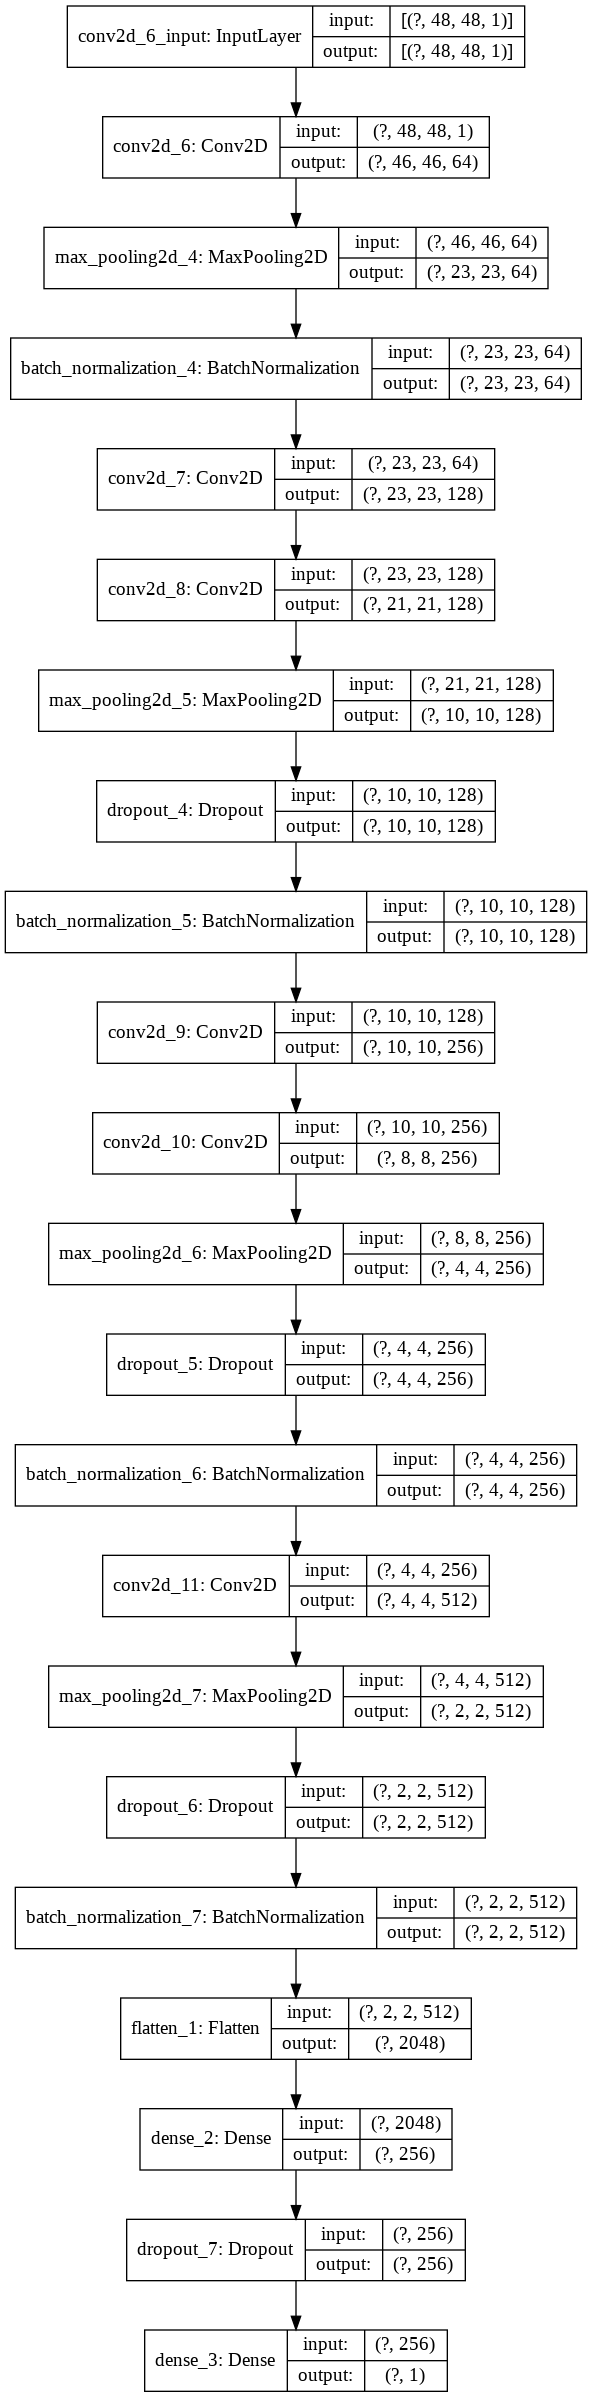

In [ ]:
tf.keras.utils.plot_model(
    loaded_model_age, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

In [ ]:
y_pred_l = loaded_model_age.predict(X_test)
y_pred_age_load = y_pred_l[:,0]
print("MAE: {}".format(mean_absolute_error(y_age_test, y_pred_l)))
print(y_pred_l)


MAE: 6.350589943716811
[[46.631916]
 [60.939175]
 [22.974232]
 ...
 [38.716373]
 [38.488987]
 [40.80868 ]]


In [ ]:
print(y_age_test)

[30 56 21 ... 35 35 46]


# GENDER


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_gender, test_size=0.2, random_state=42)

In [ ]:
gender_model = Sequential()

gender_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.4))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))
gender_model.add(Dropout(0.5))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())

gender_model.add(Dense(64, activation='relu'))
gender_model.add(Dropout(0.4))

gender_model.add(Dense(1, activation='sigmoid')) #For binary classification activation function is sigmoid 

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is binary_crossentropy

gender_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 128)         0

In [ ]:
# Callbacks for gender model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
              ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
history = gender_model.fit(X_train, y_gender_train, 
                           epochs=n_epochs,
                           batch_size=batch_size,
                           callbacks=callbacks,
                           validation_data=(X_cv, y_gender_cv))
export_path='/content/drive/MyDrive/ML/cnn_gender'
tf.saved_model.save(gender_model, export_path)

Epoch 1/20
216/216 [==============================] - 255s 1s/step - loss: 0.5571 - accuracy: 0.7337 - val_loss: 1.8065 - val_accuracy: 0.5214
Epoch 2/20
216/216 [==============================] - 255s 1s/step - loss: 0.3857 - accuracy: 0.8240 - val_loss: 0.5707 - val_accuracy: 0.6506
Epoch 3/20
216/216 [==============================] - 255s 1s/step - loss: 0.3389 - accuracy: 0.8464 - val_loss: 0.3567 - val_accuracy: 0.8413
Epoch 4/20
216/216 [==============================] - 254s 1s/step - loss: 0.3079 - accuracy: 0.8649 - val_loss: 0.4430 - val_accuracy: 0.7932
Epoch 5/20
216/216 [==============================] - 254s 1s/step - loss: 0.2933 - accuracy: 0.8666 - val_loss: 0.2991 - val_accuracy: 0.8629
Epoch 6/20
216/216 [==============================] - 253s 1s/step - loss: 0.2797 - accuracy: 0.8755 - val_loss: 0.2915 - val_accuracy: 0.8684
Epoch 7/20
216/216 [==============================] - 253s 1s/step - loss: 0.2794 - accuracy: 0.8767 - val_loss: 0.3002 - val_accuracy: 0.8642

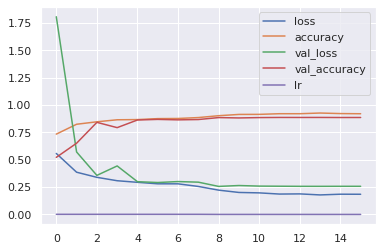

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
# Metrics
valid_score = gender_model.evaluate(X_test, y_gender_test, verbose=1)
print('Accuracy for test set: {0}'.format(valid_score[1]))

144/144 [==============================] - 20s 138ms/step - loss: 0.2519 - accuracy: 0.8943
Accuracy for test set: 0.8942894339561462


In [ ]:
y_pred = gender_model.predict_classes(X_test)


NameError: ignored

In [ ]:
print(classification_report(y_gender_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2347
           1       0.89      0.89      0.89      2241

    accuracy                           0.89      4588
   macro avg       0.89      0.89      0.89      4588
weighted avg       0.89      0.89      0.89      4588



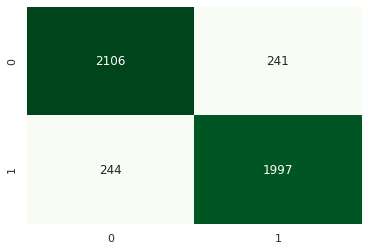

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_gender_test, y_pred)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

In [ ]:
#loading and verifying by printing classification report
export_path='/content/drive/MyDrive/ML/cnn_gender'
tf.saved_model.save(gender_model, export_path)

NameError: ignored

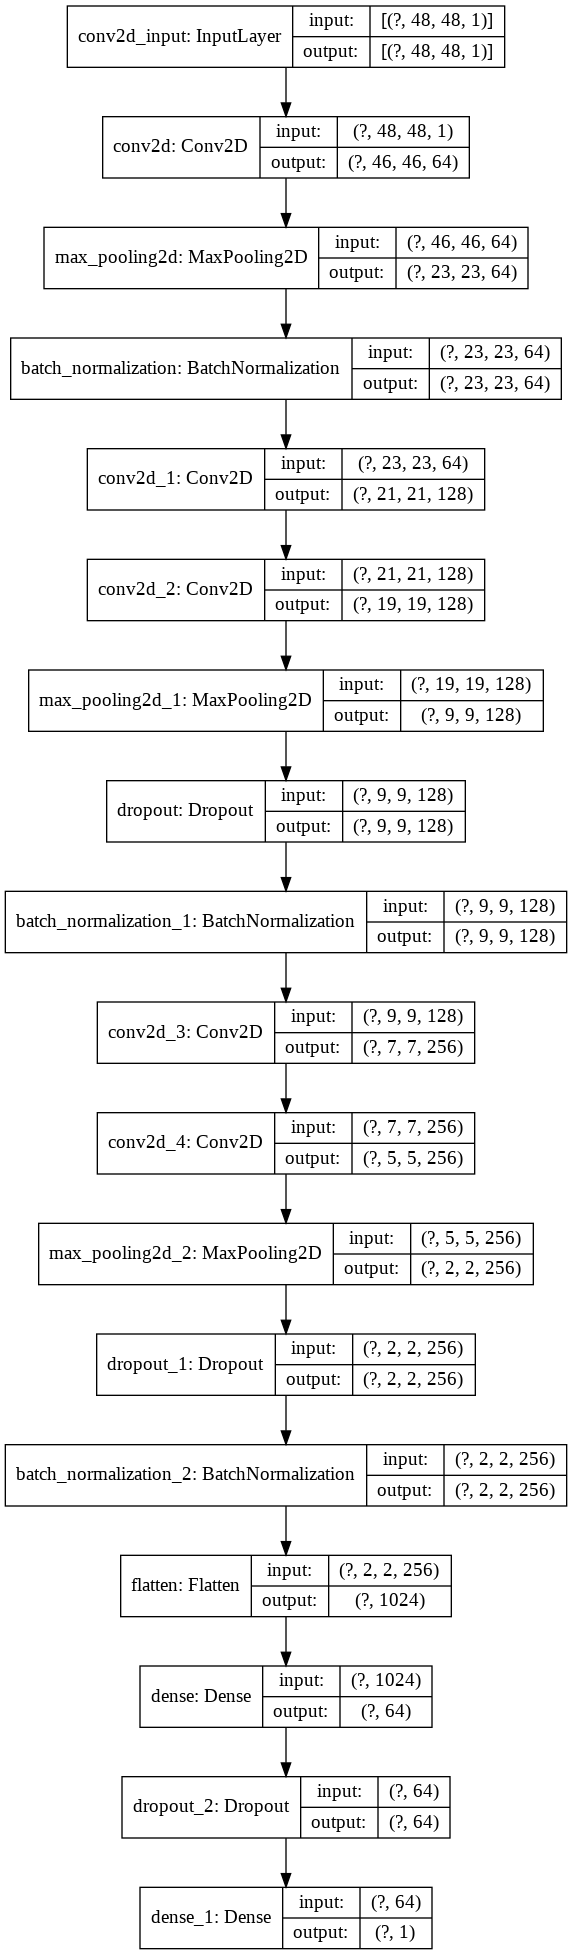

In [ ]:
export_path='/content/drive/MyDrive/ML/all_saved_models/cnn_gender'
loaded_model_gender=tf.keras.models.load_model(export_path)
#y_pred_load = loaded_model_gender.predict_classes(X_test)
#y_pred_gender_load = y_pred_load[:,0]
##print(classification_report(y_gender_test, y_pred_load))
#print(y_pred_gender_load)
tf.keras.utils.plot_model(
    loaded_model_gender, to_file='model_gender.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)

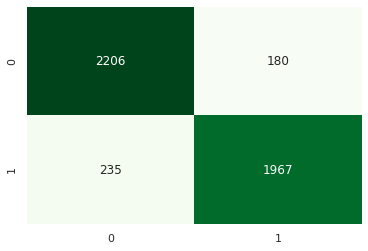

In [ ]:
#verifying by confusion matrix
cm = confusion_matrix(y_gender_test, y_pred_load)
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d');

In [ ]:
y_pred = loaded_model_gender.predict_classes(X_test)
y_pred = y_pred.reshape(y_pred.shape[0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


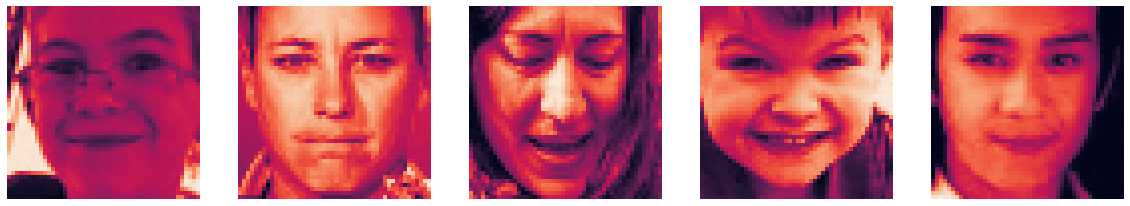

In [ ]:
# Model predict is female, but actually it's male

X_fp = X_test[(y_pred == 1) & (y_gender_test == 0)] 

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fp))
    
    axes[i].imshow(X_fp[random_choice].reshape(48, 48))
    axes[i].axis('off')

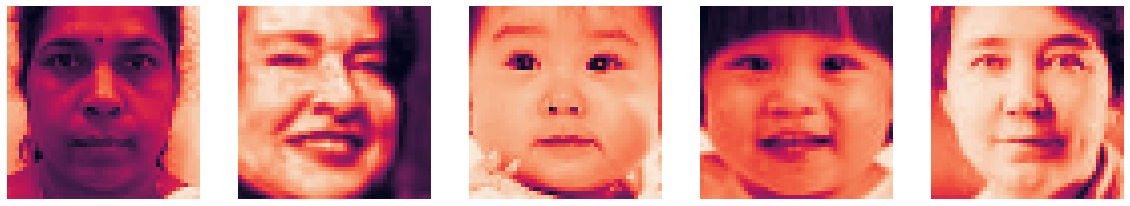

In [ ]:
# Model predict is male, but actually it's female
X_fn = X_test[(y_pred == 0) & (y_gender_test == 1)]  

fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i in range(5):
    
    random_choice = np.random.choice(len(X_fn))
    axes[i].imshow(X_fn[random_choice].reshape(48, 48))
    axes[i].axis('off')

In [ ]:
# Set y
# y = df_final['ethnicity'].values

# Multiclass problem transform to one_hot_encoding
# y = to_categorical(y, 5)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(22940,)


# Ethnicity

In [ ]:
eth_model = Sequential()

eth_model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(BatchNormalization())

eth_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
eth_model.add(MaxPooling2D(pool_size=(2,2)))
eth_model.add(Dropout(0.5))
eth_model.add(BatchNormalization())

eth_model.add(Flatten())
eth_model.add(Dense(128, activation='relu'))
eth_model.add(Dropout(0.5))
eth_model.add(Dense(5, activation='sigmoid')) #For multiclass classification activation function is softmax 

eth_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #...and loss function is categorical_crossentropy

eth_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 256)        

In [ ]:
# Callbacks for ethnicity model
callbacks = [EarlyStopping(patience=4, monitor='val_accuracy', mode='max'), 
             ReduceLROnPlateau(patience=2, verbose=1)]

In [ ]:
history = eth_model.fit(X_train, y_ethnicity_train, 
                         epochs=n_epochs,
                         batch_size=batch_size,
                         callbacks=callbacks,
                         validation_data=(X_cv, y_ethnicity_cv))
export_path='/content/drive/MyDrive/ML/cnn_eth'
tf.saved_model.save(eth_model, export_path)

Epoch 1/20
216/216 [==============================] - 130s 604ms/step - loss: 0.4004 - accuracy: 0.5641 - val_loss: 0.8838 - val_accuracy: 0.4191
Epoch 2/20
216/216 [==============================] - 131s 606ms/step - loss: 0.3044 - accuracy: 0.6889 - val_loss: 0.4754 - val_accuracy: 0.4632
Epoch 3/20
216/216 [==============================] - 129s 597ms/step - loss: 0.2790 - accuracy: 0.7181 - val_loss: 0.3369 - val_accuracy: 0.5883
Epoch 4/20
216/216 [==============================] - 129s 597ms/step - loss: 0.2575 - accuracy: 0.7438 - val_loss: 0.2511 - val_accuracy: 0.7367
Epoch 5/20
216/216 [==============================] - 129s 598ms/step - loss: 0.2412 - accuracy: 0.7580 - val_loss: 0.2274 - val_accuracy: 0.7711
Epoch 6/20
216/216 [==============================] - 129s 596ms/step - loss: 0.2245 - accuracy: 0.7743 - val_loss: 0.2626 - val_accuracy: 0.7254
Epoch 7/20
215/216 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.7887
Epoch 00007: ReduceLROnPlate

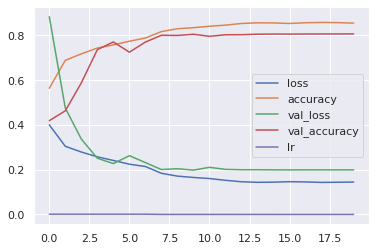

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
valid_score = eth_model.evaluate(X_test, y_ethnicity_test, verbose=1)

144/144 [==============================] - 11s 73ms/step - loss: 0.1961 - accuracy: 0.8043


In [ ]:
y_pred = eth_model.predict_classes(X_test)

In [ ]:
# Convert to 0 to 4 scale 
y_test_labels = [np.argmax(i) for i in y_ethnicity_test]

In [ ]:
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      2008
           1       0.86      0.88      0.87       882
           2       0.84      0.84      0.84       648
           3       0.69      0.78      0.74       720
           4       0.28      0.04      0.07       330

    accuracy                           0.80      4588
   macro avg       0.70      0.69      0.67      4588
weighted avg       0.77      0.80      0.78      4588



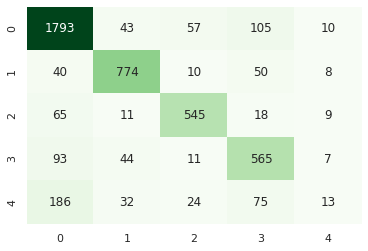

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

#np.fill_diagonal(cm, 0) #Fill diagonal with 0 for better visualisation
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Greens');

In [ ]:
#loaded model verification
export_path='/content/drive/MyDrive/ML/cnn_eth'
loaded_model_eth=tf.keras.models.load_model(export_path)
y_pred_ethload = loaded_model_eth.predict_classes(X_test)
y_pred_ethnicity_load = y_pred_ethload
# Convert to 0 to 4 scale 
y_test_labels = [np.argmax(i) for i in y_ethnicity_test]
print(classification_report(y_test_labels, y_pred_ethload))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1936
           1       0.91      0.93      0.92       882
           2       0.92      0.92      0.92       661
           3       0.82      0.89      0.85       796
           4       0.55      0.22      0.32       313

    accuracy                           0.87      4588
   macro avg       0.82      0.78      0.78      4588
weighted avg       0.86      0.87      0.86      4588



In [ ]:
#Printing predicted values

#Printing age
# y_pred_age_load = y_pred_age_load[:,0]
print(y_pred_age_load)
#Printing gender
# y_pred_gender_load = y_pred_gender_load[:,0]
print(y_pred_gender_load)
#Printing ethnicity
# y_pred_ethnicity_load[:,0]
print(y_pred_ethnicity_load)

[71.13716  48.701553 40.671783 ... 66.74884  25.500595 26.737276]
[0 0 0 ... 0 1 1]
[0 1 1 ... 0 2 0]


In [ ]:
#Printing actual values

#Printing age
print(y_age_test)
#Printing gender
print(y_gender_test)
#Printing ethnicity
y_ethnicity_test_labels = [np.argmax(i) for i in y_ethnicity_test]
print(y_ethnicity_test_labels)


print(len(y_age_test))
print(len(y_gender_test))
print(len(y_ethnicity_test_labels))

[73 54 27 ... 61 24 26]
[0 0 0 ... 0 1 1]
[0, 1, 1, 1, 1, 0, 4, 0, 0, 1, 4, 0, 2, 0, 1, 1, 0, 0, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 3, 0, 0, 3, 3, 2, 0, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 2, 0, 0, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 1, 1, 2, 3, 3, 2, 0, 0, 2, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 4, 3, 0, 0, 2, 3, 0, 4, 3, 0, 1, 0, 2, 3, 4, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 3, 1, 1, 1, 1, 3, 0, 0, 2, 0, 0, 0, 3, 0, 2, 2, 0, 4, 0, 0, 0, 0, 4, 3, 0, 0, 0, 2, 2, 1, 2, 3, 0, 0, 4, 0, 1, 1, 0, 1, 2, 3, 2, 1, 3, 1, 0, 2, 0, 0, 2, 0, 4, 0, 0, 2, 0, 0, 0, 1, 3, 1, 0, 3, 1, 3, 0, 1, 3, 0, 0, 0, 3, 2, 1, 0, 4, 1, 0, 0, 4, 3, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 3, 1, 4, 0, 1, 0, 1, 2, 1, 0, 1, 2, 3, 0, 2, 4, 0, 3, 2, 4, 3, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 3, 0, 0, 3, 1, 4, 0, 1, 3, 0, 3, 3, 3, 1, 0, 0, 1, 3, 1, 0, 1, 1, 2, 3, 0, 0, 3, 2, 0, 0, 0, 2, 4, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 3, 0, 2, 1, 

No. of misclassifications are: 415
Percentage of misclassification is: 9.045335658238884
Ethnicity 1 - 69
Ethnicity 4 - 32
Ethnicity 0 - 174
Ethnicity 3 - 48
Ethnicity 2 - 92
GROUP: lt_10,  #VALUES: 198
GROUP: gte_10_lt_25,  #VALUES: 66
GROUP: gte_25_lt_40,  #VALUES: 65
GROUP: gt_40,  #VALUES: 83


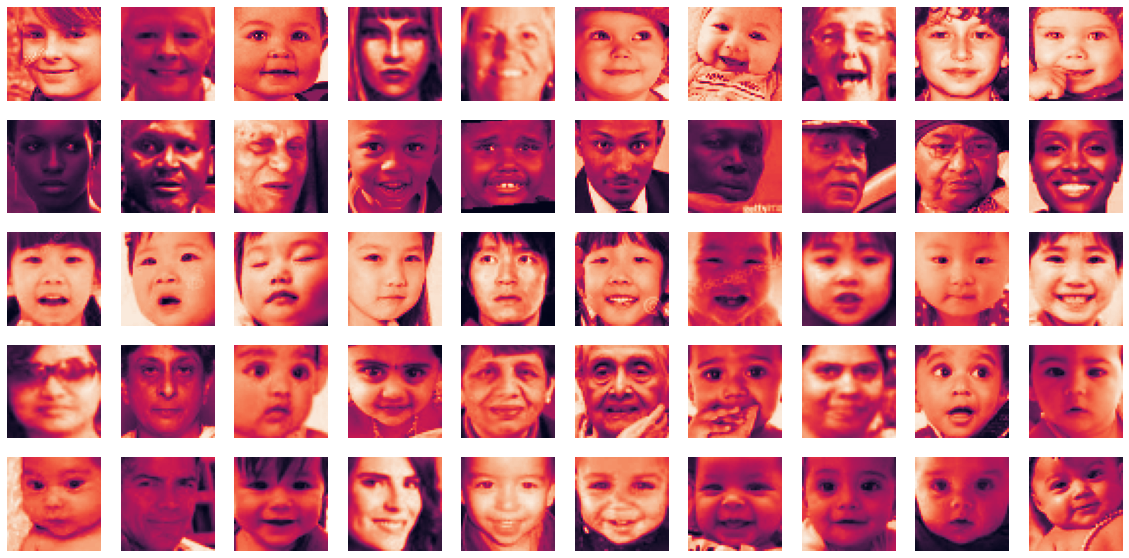

In [ ]:
n = len(y_age_test)

#Analysing gender
gender_misclass_indices = []
gender_groupby_ethnicity = {}
gender_groupby_age = { 'lt_10' : [], 'gte_10_lt_25' : [], 'gte_25_lt_40' : [], 'gt_40' : [] }
for i in range(0, n):
  gender_test = y_gender_test[i]
  gender_pred = y_pred_gender_load[i]
  
  #Finding indexes of gender which is misclassified
  if gender_test != gender_pred:
    #Appending the index of misclassified sample into a list
    gender_misclass_indices.append(i)

    #Adding its ethnicity value 
    ethnicity = y_ethnicity_test_labels[i]
    # print(ethnicity)
    if ethnicity not in gender_groupby_ethnicity:
      gender_groupby_ethnicity[ethnicity] = []

    gender_groupby_ethnicity[ethnicity].append(i)

    #Adding its age value 
    age = y_age_test[i]
    if age < 10:
      gender_groupby_age['lt_10'].append(i)
    elif age >= 10 and age < 25 :
      gender_groupby_age['gte_10_lt_25'].append(i)
    elif age >= 25 and age < 40 :
      gender_groupby_age['gte_25_lt_40'].append(i)
    elif age > 40:
      gender_groupby_age['gt_40'].append(i)

#No. of misclassification
no_misclass = len(gender_misclass_indices)
print('No. of misclassifications are: {0}'.format(no_misclass))
#Percentage of misclassification
print('Percentage of misclassification is: {0}'.format(100*(no_misclass/n)))

#Printing the no. of samples misclassified in each ethnciity group
fig, axes = plt.subplots(5, 10, figsize=(20, 10))
for eth in gender_groupby_ethnicity:
  print('Ethnicity {0} - {1}'.format(eth, len(gender_groupby_ethnicity[eth])))

  first_five_indices = gender_groupby_ethnicity[eth][:10]
  #Printing random 5 images of this ethnicity
  
  for i in range(0, len(first_five_indices)):  
    index = first_five_indices[i]
    axes[eth][i].imshow(X_test[index].reshape((48,48)))
    axes[eth][i].axis('off')

#No of samples by age group
for age_grp in gender_groupby_age:
  print('GROUP: {0},  #VALUES: {1}'.format(age_grp, len(gender_groupby_age[age_grp])))

No. of misclassifications are: 588
Percentage of misclassification is: 12.816041848299914
Gender 1 - 311
Gender 0 - 277
GROUP: lt_10,  #VALUES: 94
GROUP: gte_10_lt_25,  #VALUES: 129
GROUP: gte_25_lt_40,  #VALUES: 240
GROUP: gt_40,  #VALUES: 112


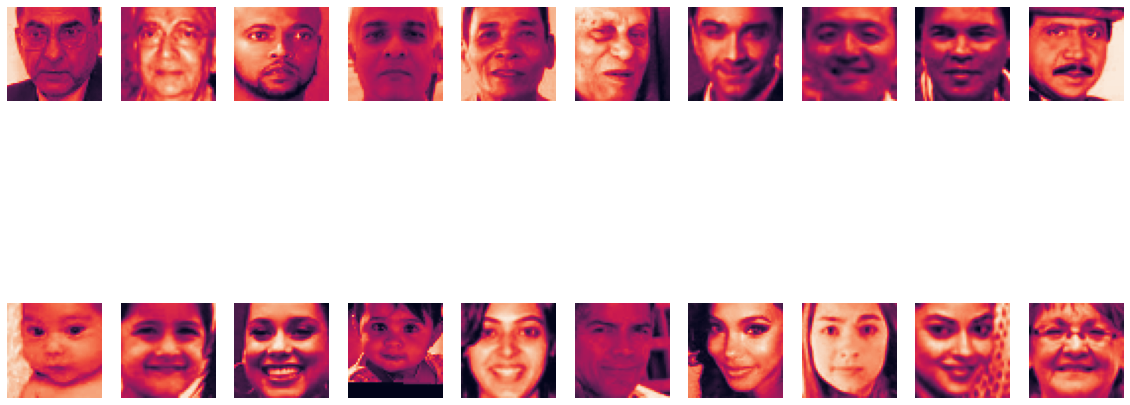

In [ ]:
#Finding the misclassification of gender grouped by ethnicity
n = len(y_age_test)

#Analysing gender
ethnicity_misclass_indices = []
ethnicity_groupby_gender = {}
ethnicity_groupby_age = { 'lt_10' : [], 'gte_10_lt_25' : [], 'gte_25_lt_40' : [], 'gt_40' : [] }
for i in range(0, n):
  ethnicity_test = y_ethnicity_test_labels[i]
  ethnicity_pred = y_pred_ethnicity_load[i]
  
  #Finding indexes of gender which is misclassified
  if ethnicity_test != ethnicity_pred:
    #Appending the index of misclassified sample into a list
    ethnicity_misclass_indices.append(i)

    #Adding its gender value 
    gender = y_gender_test[i]
    # print(gender)
    if gender not in ethnicity_groupby_gender:
      ethnicity_groupby_gender[gender] = []

    ethnicity_groupby_gender[gender].append(i)

    #Adding its age value 
    age = y_age_test[i]
    if age < 10:
      ethnicity_groupby_age['lt_10'].append(i)
    elif age >= 10 and age < 25 :
      ethnicity_groupby_age['gte_10_lt_25'].append(i)
    elif age >= 25 and age < 40 :
      ethnicity_groupby_age['gte_25_lt_40'].append(i)
    elif age > 40:
      ethnicity_groupby_age['gt_40'].append(i)

#No. of misclassification
no_misclass = len(ethnicity_misclass_indices)
print('No. of misclassifications are: {0}'.format(no_misclass))
#Percentage of misclassification
print('Percentage of misclassification is: {0}'.format(100*(no_misclass/n)))

#Printing the no. of samples misclassified in each ethnciity group
fig, axes = plt.subplots(2, 10, figsize=(20, 10))
for eth in ethnicity_groupby_gender:
  print('Gender {0} - {1}'.format(eth, len(ethnicity_groupby_gender[eth])))

  first_five_indices = ethnicity_groupby_gender[eth][:10]
  #Printing random 5 images of this ethnicity
  
  for i in range(0, len(first_five_indices)):  
    index = first_five_indices[i]
    axes[eth][i].imshow(X_test[index].reshape((48,48)))
    axes[eth][i].axis('off')

#No of samples by age group
for age_grp in ethnicity_groupby_age:
  print('GROUP: {0},  #VALUES: {1}'.format(age_grp, len(ethnicity_groupby_age[age_grp])))